**This jupyter notebook tests different losses that can be used for creating dream images using activation maximization**

In [1]:
import sys
sys.path.append("../")

In [2]:
from library.deep_dream import *
from library.dict_network.dict_net import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

*Create a DictNet with 1000 neurons in last layer*

In [3]:
net = DictNet(1000)

*Load a previously trained network. This network has achieved ~99% training accuracy and ~85% validation accuracy in classification on 1000 5 letter words from MjSynth*

In [4]:
net.load_state_dict(torch.load("../code/train_dict_network/out5/net_1000_0.001_200_0.0.pth",map_location=torch.device('cpu')))

<All keys matched successfully>

*Define a function to create dream images by taking a particular label and loss type as inputs*

In [5]:
def show_dream(dreamer,label,loss_type,use_gaussian_filter=True):
    dreamer.use_gaussian_filter = use_gaussian_filter
    im,val,loss_list = dreamer(label=label,loss_type=loss_type)
    im = dreamer.postProcess(im)
    dreamer.show(im)
    return loss_list

*Create a dreamer object with image size, mean and std of Mjsynth dataset*

In [6]:
dreamer = DeepDream(net,(1,32,128),(0.47,),(0.14,),use_gaussian_filter=True)
label = 3 # label 3 is the word 'brawl'

*Do a forward pass on a random input to check the final 1000 activations on the network of the dreamer*

In [7]:
random_seed = 1
im = dreamer.createInputImage(random_seed)
im = dreamer.prepInputImage(im)
im = im.to(dreamer.device)

im = Variable(im.unsqueeze(0),requires_grad=True)
out = dreamer.net(im)
print(out)

tensor([[-17.9846, -19.2601, -28.0493, -21.2189, -27.0447, -22.4356, -29.4483,
         -30.8007, -26.6092, -25.9644, -28.1576, -13.9686, -12.8357, -17.2985,
         -25.1649, -17.0957, -29.2109, -11.9925, -29.5555, -32.9392, -16.6000,
         -23.1676, -37.1933, -25.0857, -28.9453, -15.1361, -18.3021, -18.8234,
         -22.9298, -33.3764, -29.9961, -24.0824, -38.4143, -36.0277, -22.6216,
         -28.2430, -27.3974, -30.4518, -21.4309, -25.4372, -14.1683, -26.8353,
         -22.3954, -21.6041, -20.8627, -22.3918, -22.4158, -23.2784, -23.2099,
         -35.2590, -30.1073, -37.4708, -22.3319, -26.8098, -21.4841, -18.5290,
         -23.5427, -12.9472, -24.9750, -30.3614, -12.5250, -25.4809, -32.9440,
         -21.7093, -28.9857, -20.2421, -28.7917, -22.7046, -15.4786, -12.5763,
         -30.7332, -21.0737, -24.0240, -19.6376, -25.6479, -27.0875, -18.2736,
         -31.0667, -16.0126, -22.9102, -23.2408, -24.8081, -27.7675, -21.5872,
         -27.0205, -23.1479, -13.9012, -23.8746, -13

*We observe that all activations at the final layer are negative. The index with least absolute value will be the predicted label. Now, let's start studying the effect of various loss types on the dreaming process*

*Loss type 1 is simply the activation value for the set label at final layer. Let's create dreams for label 3 ('Brawl') with and without gaussian filter and check activation and losses*

Activation before optimizing : -20.862892150878906 
Probablity before optimizing : 0.7370874285697937 and label 225
Dreaming...
Activation after optimizing : 75.06848907470703 
Probablity after optimizing : 1.0 and label 3


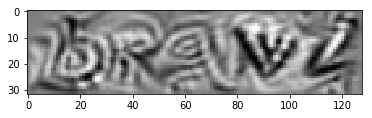

In [8]:
loss_type = 1
loss_list_w_g = show_dream(dreamer,label,loss_type)

Activation before optimizing : -20.862892150878906 
Probablity before optimizing : 0.7370874285697937 and label 225
Dreaming...
Activation after optimizing : 104.00525665283203 
Probablity after optimizing : 1.0 and label 3


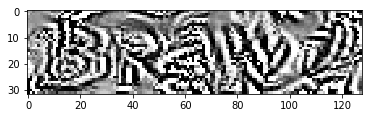

In [9]:
loss_type = 1
loss_list_wo_g = show_dream(dreamer,label,loss_type,use_gaussian_filter=False)

*Let's plot the successive losses in the 100 iterations in which the dream was created*

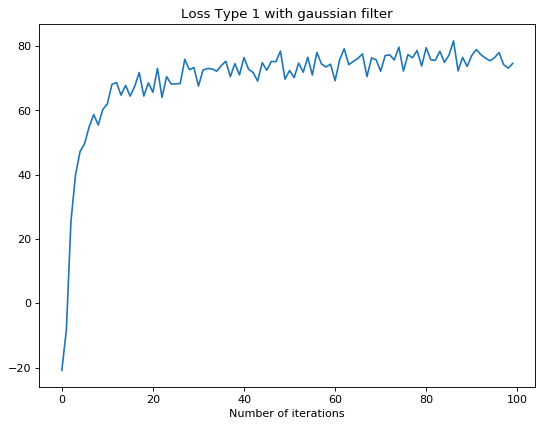

In [10]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(loss_list_w_g)
plt.title("Loss Type 1 with gaussian filter")
plt.xlabel("Number of iterations")
plt.show()

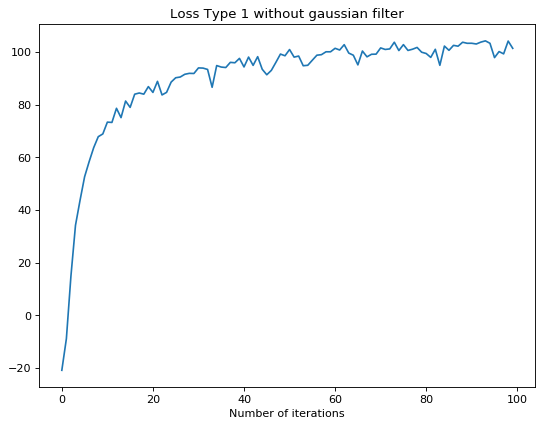

In [11]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(loss_list_wo_g)
plt.title("Loss Type 1 without gaussian filter")
plt.xlabel("Number of iterations")
plt.show()

*Loss type 2 is simply the negative of the activation of the set label at the final layer*

Activation before optimizing : -20.862892150878906 
Probablity before optimizing : 0.7370874285697937 and label 225
Dreaming...
Activation after optimizing : -148.9874725341797 
Probablity after optimizing : 0.999984860420227 and label 880


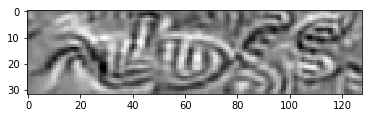

In [12]:
loss_type = 2
loss_list = show_dream(dreamer,label,loss_type)

*Again plotting the successive losses*

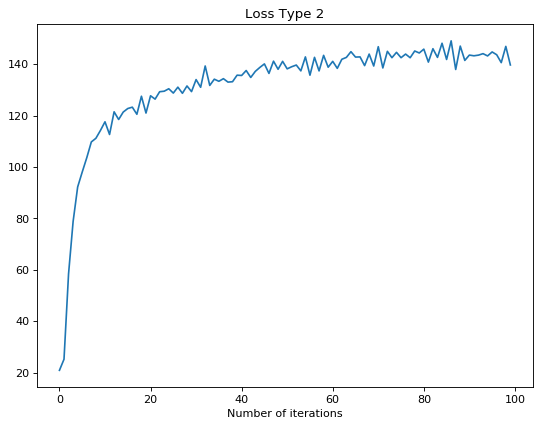

In [13]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(loss_list)
plt.title("Loss Type 2")
plt.xlabel("Number of iterations")
plt.show()

*Loss type 3 is the label value after softmaxing the final layer activations. softmax(out)[label]* 

Activation before optimizing : -20.862892150878906 
Probablity before optimizing : 0.7370874285697937 and label 225
Dreaming...
Activation after optimizing : 24.819061279296875 
Probablity after optimizing : 1.0 and label 3


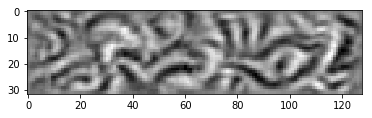

In [14]:
loss_type = 3
loss_list = show_dream(dreamer,label,loss_type)

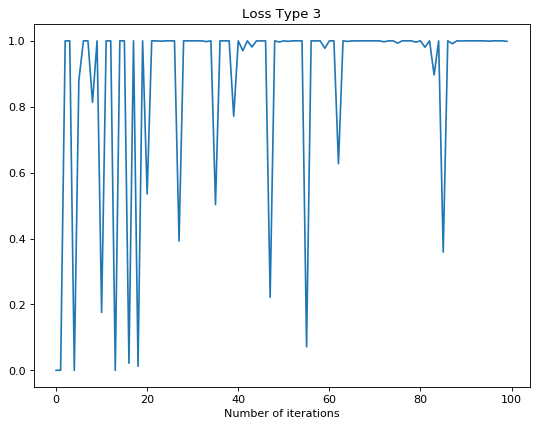

In [15]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(loss_list)
plt.title("Loss Type 3")
plt.xlabel("Number of iterations")
plt.show()

*Loss type 4 is the - label value after softmaxing the final layer activations. - softmax(out)[label]* 

Activation before optimizing : -20.862892150878906 
Probablity before optimizing : 0.7370874285697937 and label 225
Dreaming...
Activation after optimizing : nan 
Probablity after optimizing : nan and label 0


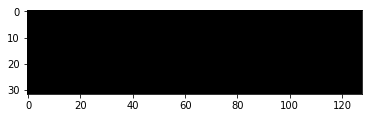

In [16]:
loss_type = 4
loss_list = show_dream(dreamer,label,loss_type)

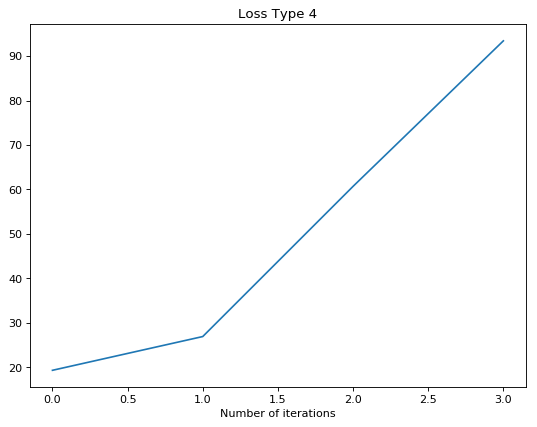

In [17]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(loss_list)
plt.title("Loss Type 4")
plt.xlabel("Number of iterations")
plt.show()

*Loss 5 is the crossentropy loss, the same that is used for classification*

Activation before optimizing : -20.862892150878906 
Probablity before optimizing : 0.7370874285697937 and label 225
Dreaming...
Activation after optimizing : -70.68262481689453 
Probablity after optimizing : 1.0 and label 225


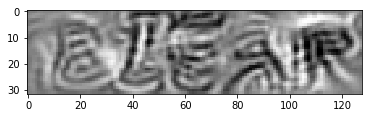

In [18]:
loss_type = 5
loss_list = show_dream(dreamer,label,loss_type)

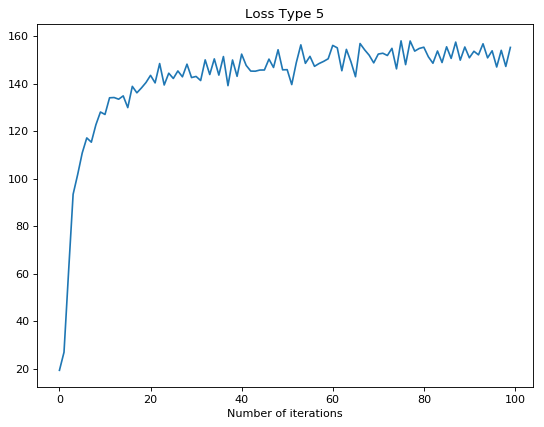

In [19]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(loss_list)
plt.title("Loss Type 5")
plt.xlabel("Number of iterations")
plt.show()

*Loss type 6 is negative of the cross entropy loss.*

Activation before optimizing : -20.862892150878906 
Probablity before optimizing : 0.7370874285697937 and label 225
Dreaming...
Activation after optimizing : 10.700428009033203 
Probablity after optimizing : 0.9999954700469971 and label 3


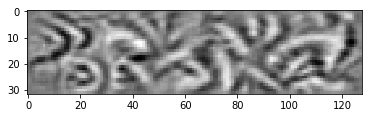

In [20]:
loss_type = 6
loss_list = show_dream(dreamer,label,loss_type)

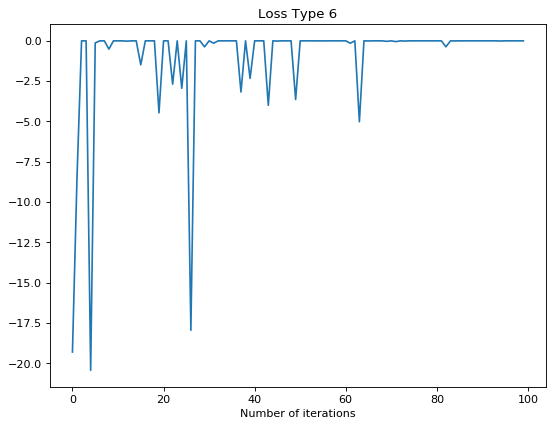

In [21]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(loss_list)
plt.title("Loss Type 6")
plt.xlabel("Number of iterations")
plt.show()